In [2]:
!nvidia-smi

Thu Oct 12 09:36:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A4000    Off  | 00000000:00:05.0 Off |                  Off |
| 41%   31C    P8    15W / 140W |      1MiB / 16376MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device
device = "mps" if torch.backends.mps.is_available() else None
print(f"Using device: {device}")

PyTorch version: 2.1.0
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [3]:
import os

HOME = os.getcwd()
print(HOME)

/Users/daniel.kaldheim/Projects/Crudus Heima/shop-price-tag


In [5]:
!pip install -q roboflow
!pip install -q ultralytics
!pip install -q python-dotenv

In [4]:
%load_ext dotenv
%dotenv

In [5]:
from dotenv import dotenv_values

config = dotenv_values(".env")

In [10]:
from roboflow import Roboflow

rf = Roboflow(api_key=config["ROBOFLOW_API_KEY"])
project = rf.workspace("daniel-kaldheim-4f58q").project("price-tags-c79pp")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Price-tags-4 in yolov8:: 100%|██████████| 2136/2136 [00:00<00:00, 2491.39it/s]


In [12]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.pt")

# Train the model

results = model.train(
    data=HOME + "/Price-tags-4/data.yaml",
    epochs=300,
    imgsz=640,
    device=device,
    save_period=25,
)

Ultralytics YOLOv8.0.196 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/notebooks/Price-tags-4/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=25, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, class


0: 480x640 6 price-tag-prices, 6 price-tags, 73.8ms
Speed: 2.0ms preprocess, 73.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


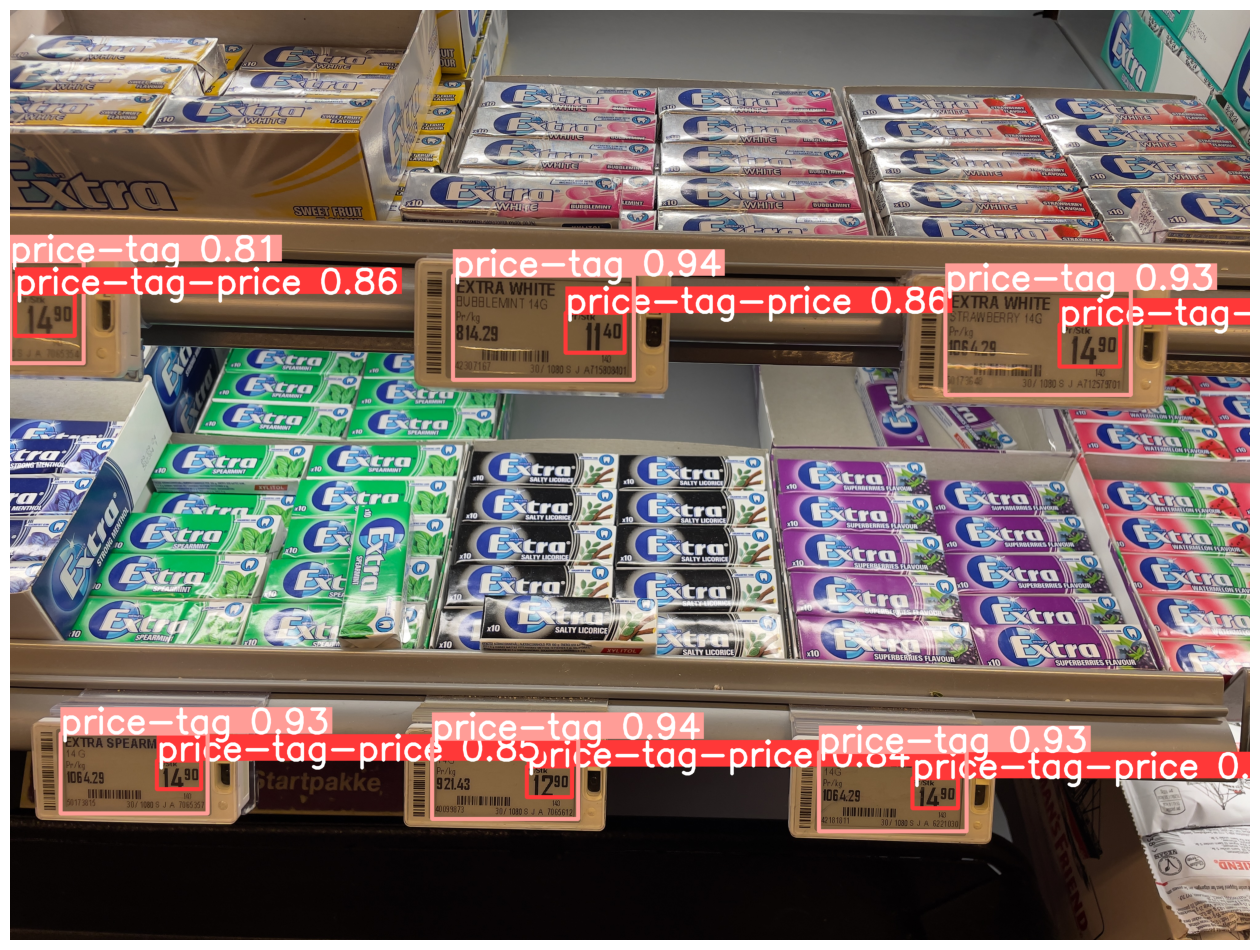

In [10]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import supervision as sv

# Load a model
# model = YOLO('yolov8n.pt')  # load an official model
model = YOLO("models/best.pt")  # load a custom model

IMAGE_NAME = "IMG_4270.jpg"
IMAGE_PATH = os.path.join(HOME, IMAGE_NAME)
cv_image = cv2.imread(IMAGE_PATH)

# Predict with the model
# results = model('Price-tags-2/valid/images/IMG_0734_jpeg.rf.5f7c304d33522c57f8d8a06c9ba8a062.jpg')  # predict on an image
results = model(cv_image)  # predict on an image

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.save("results.jpg")  # save image
    sv.plot_image(im_array, (16, 16))


0: 480x640 6 price-tag-prices, 6 price-tags, 75.8ms
Speed: 2.5ms preprocess, 75.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


[     1440.2      863.87      2028.1      1202.2]


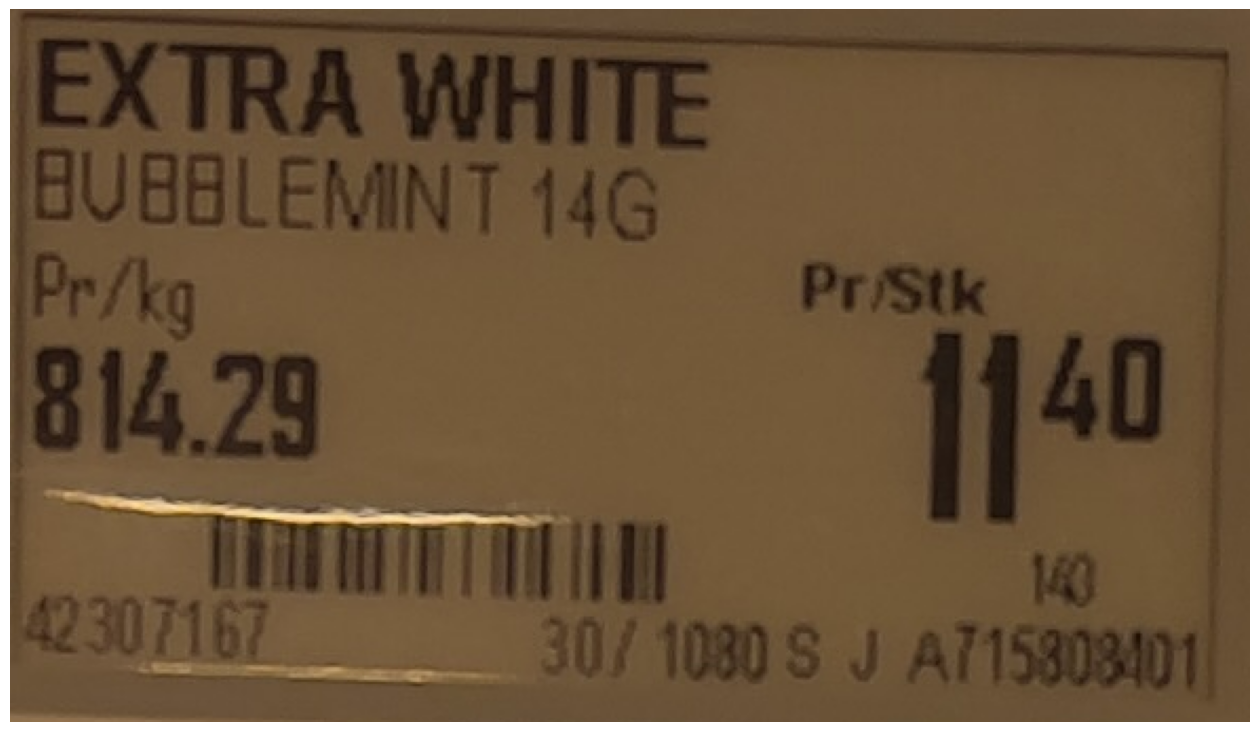

[     1372.8      2369.5      1847.2      2630.1]


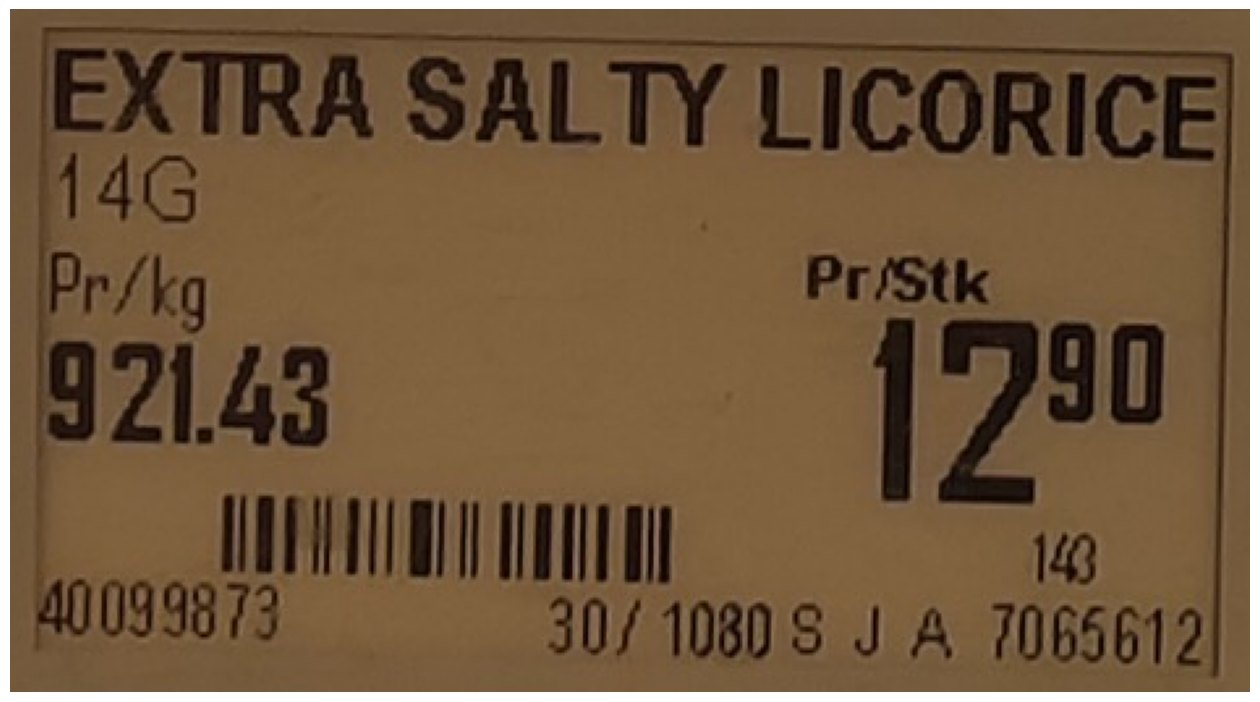

[       2630      2412.4      3110.6        2671]


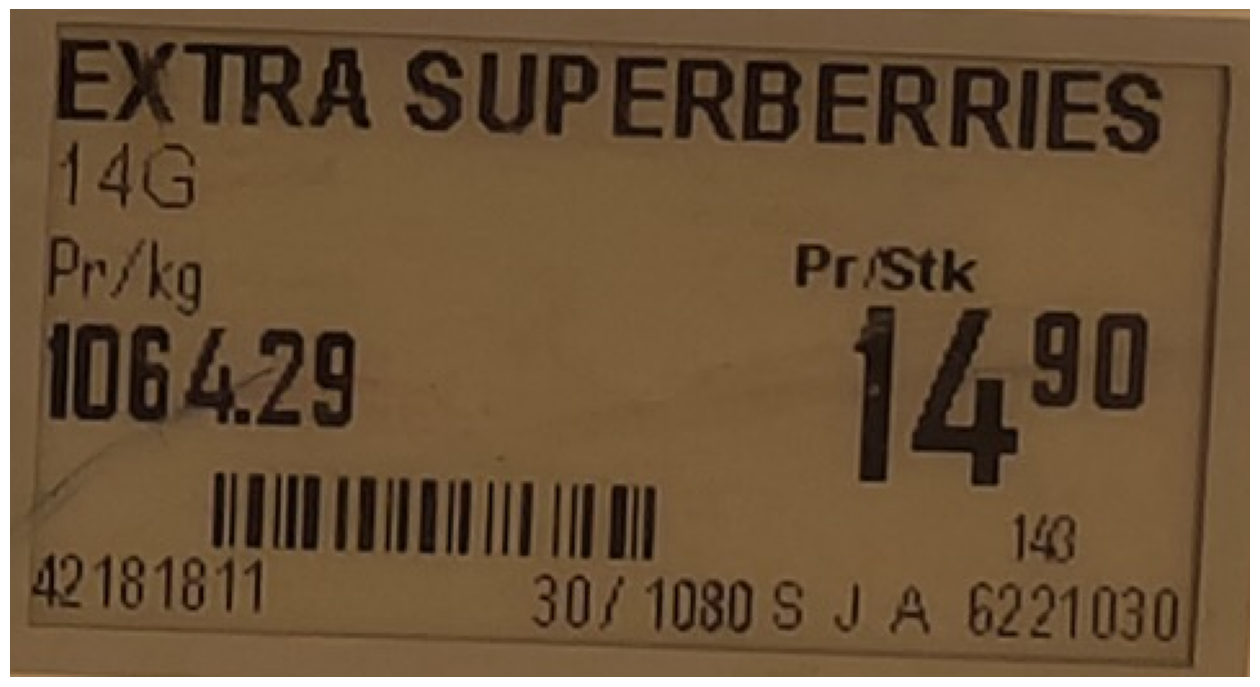

[     164.74      2352.9      642.56      2612.9]


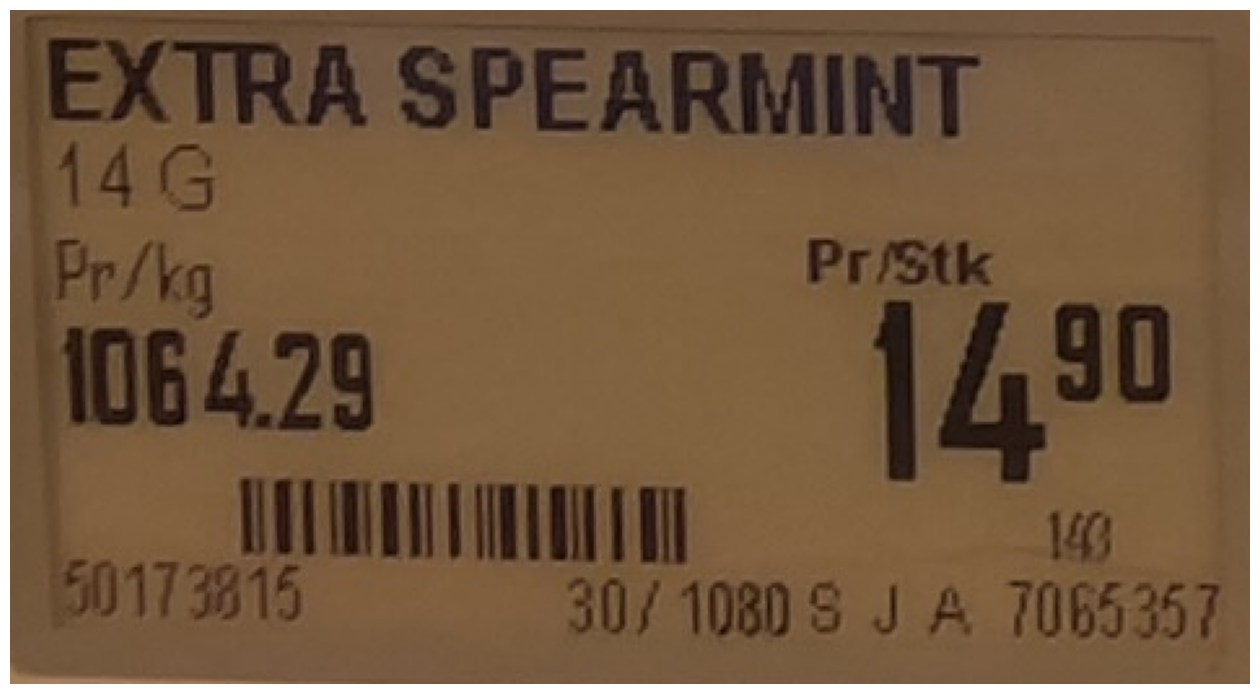

[     3041.7       909.7      3644.2        1251]


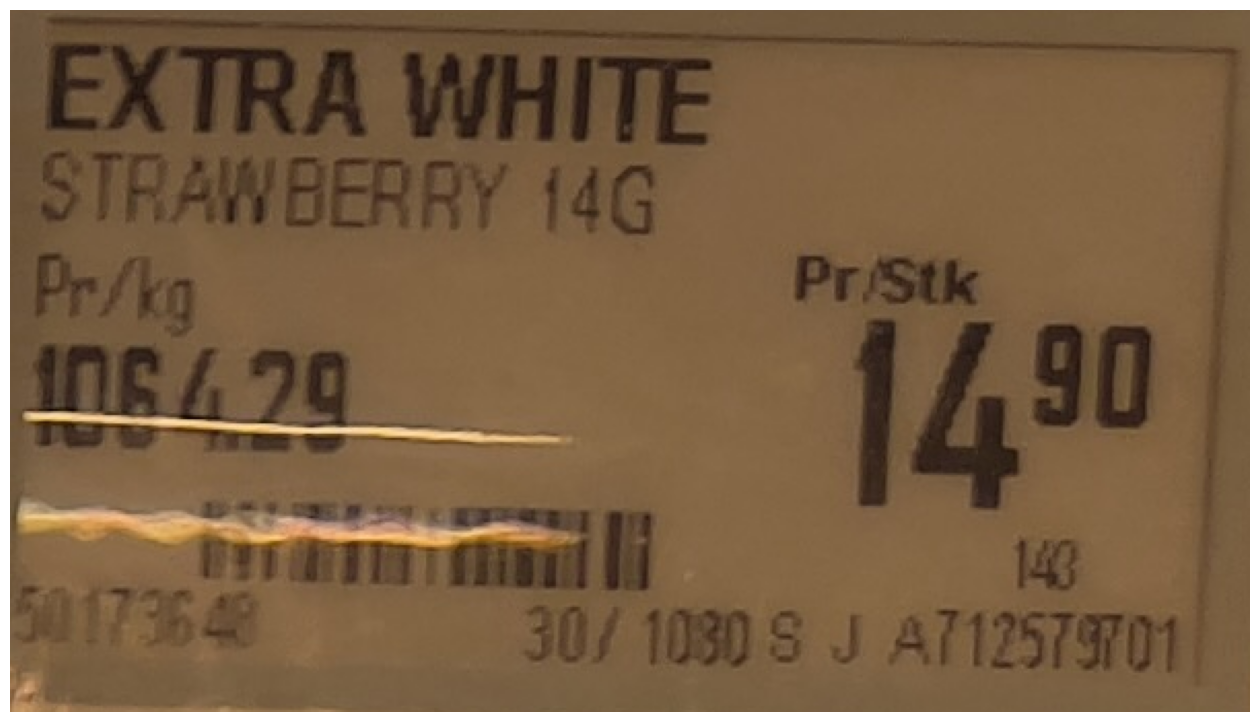

[       2934      2497.2      3082.5      2595.4]


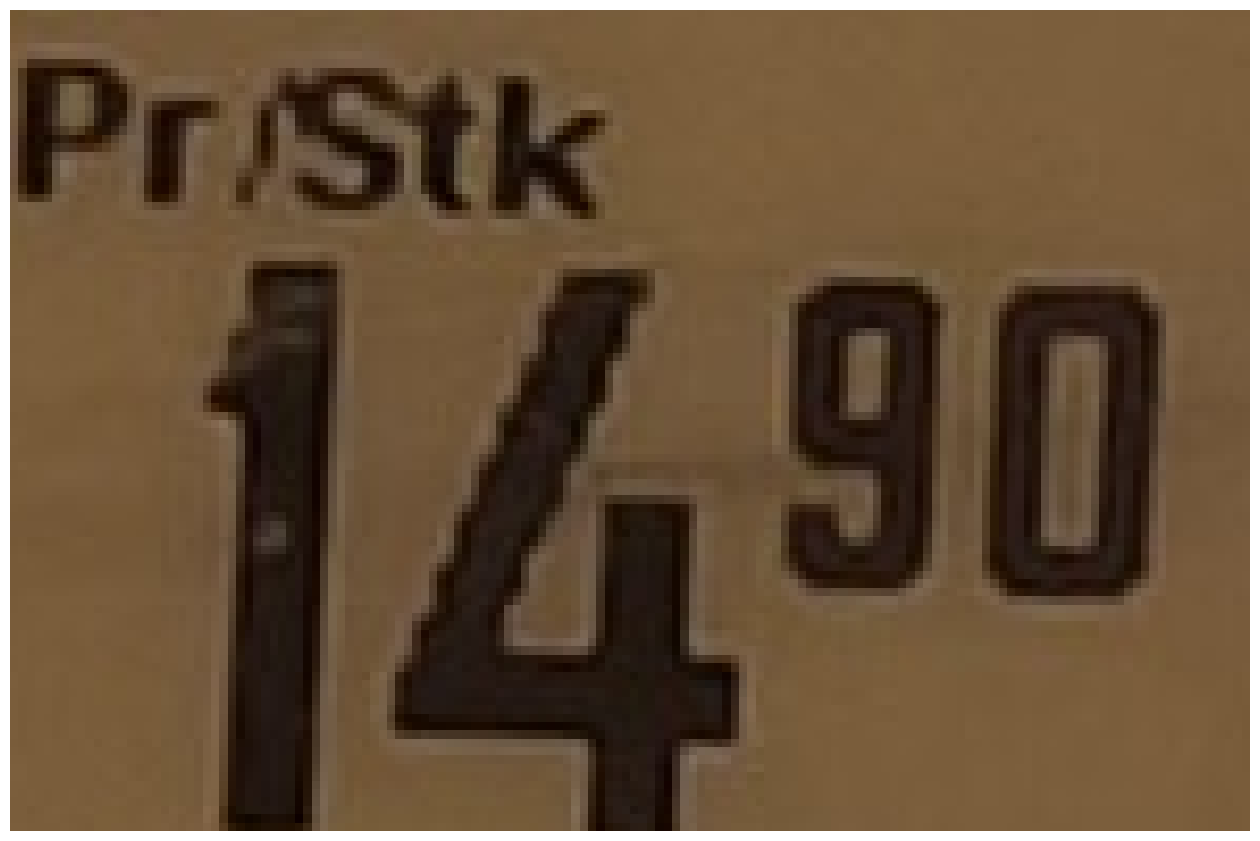

[     16.466      922.63      210.46        1059]


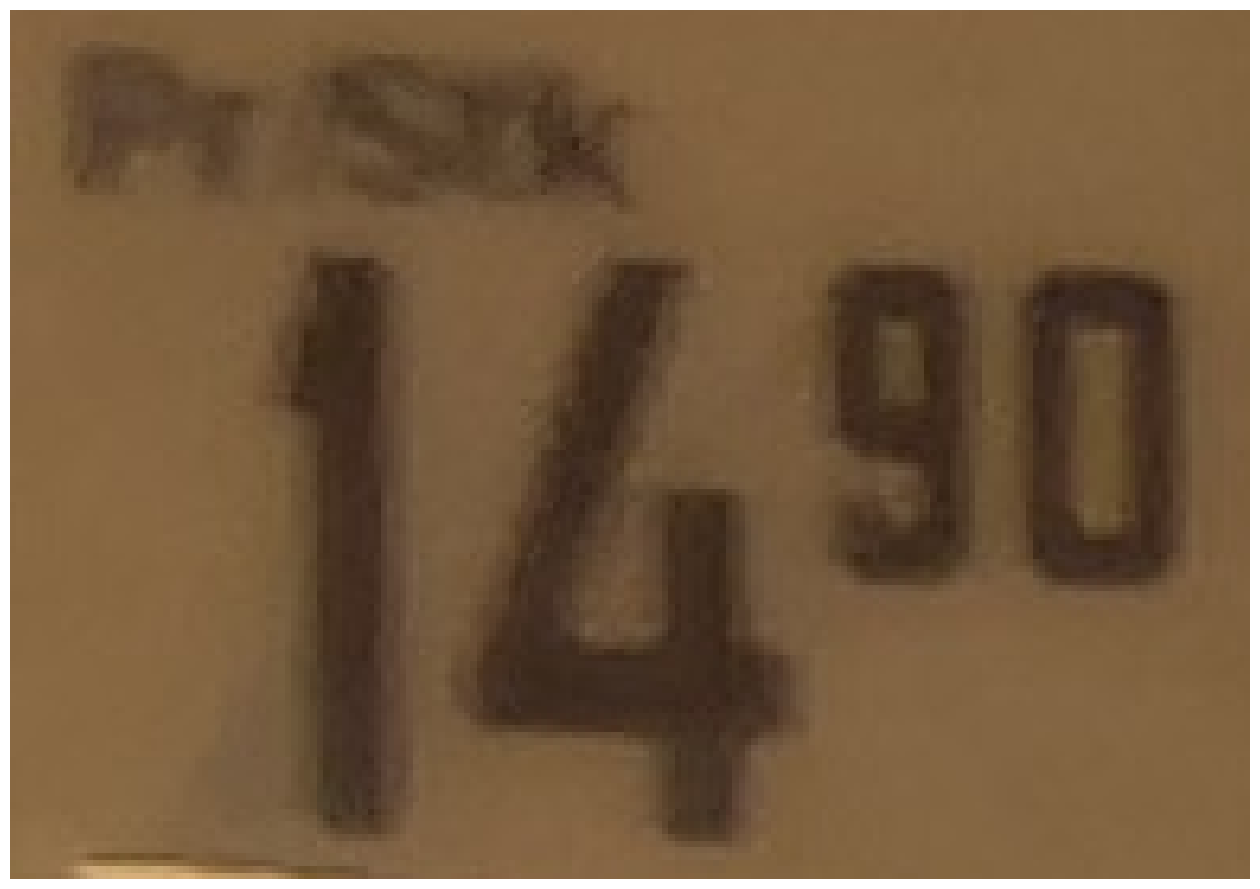

[     3412.9      1022.2      3609.6        1159]


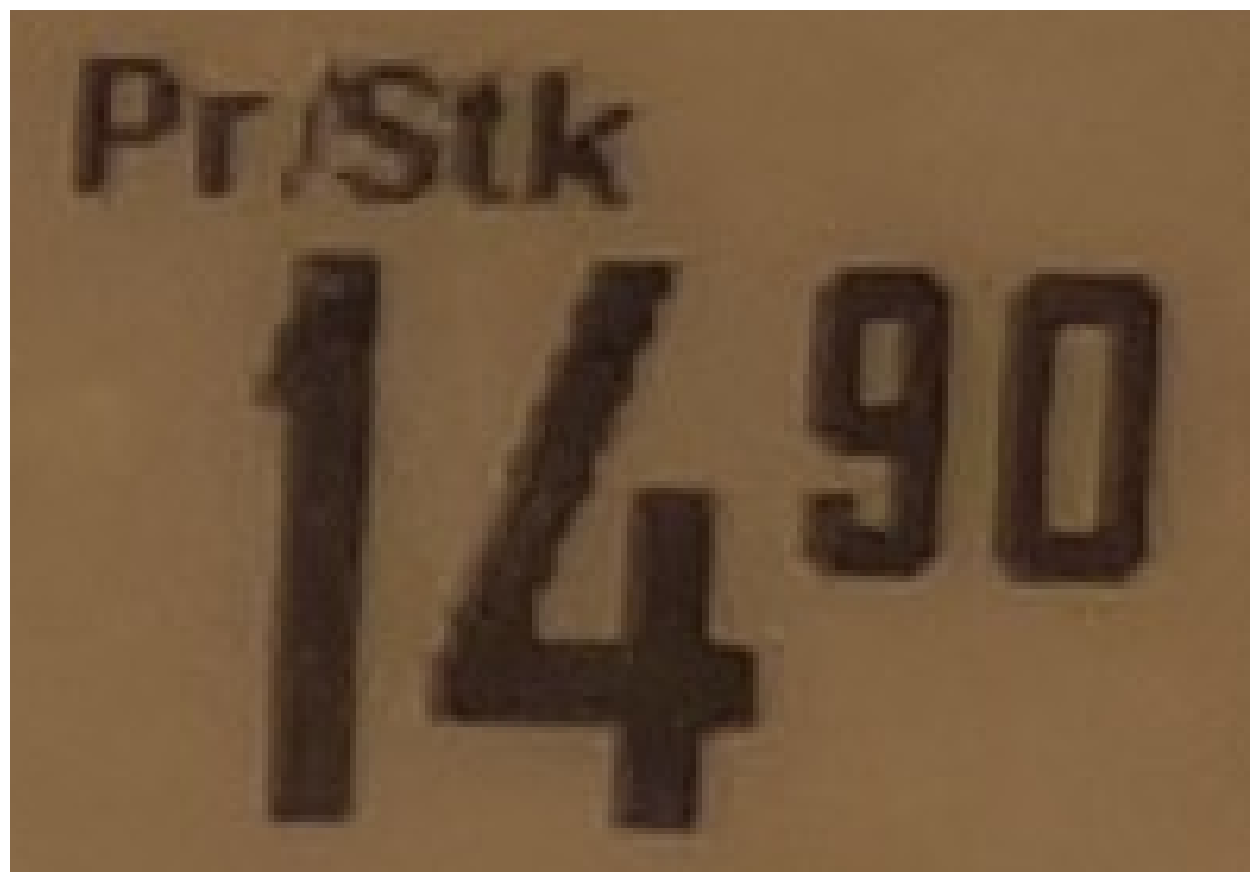

[     1806.6      984.67      1998.4      1114.4]


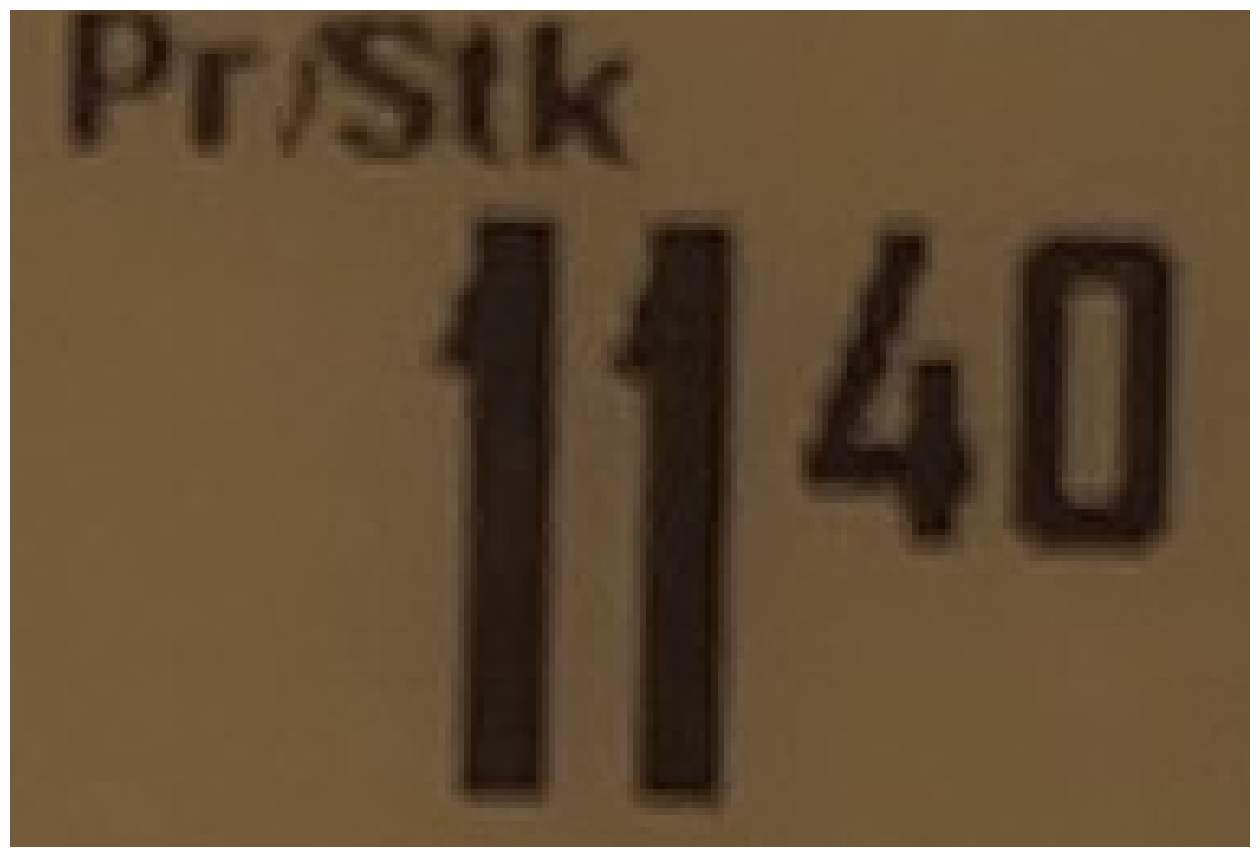

[     477.45      2440.9      621.65      2533.4]


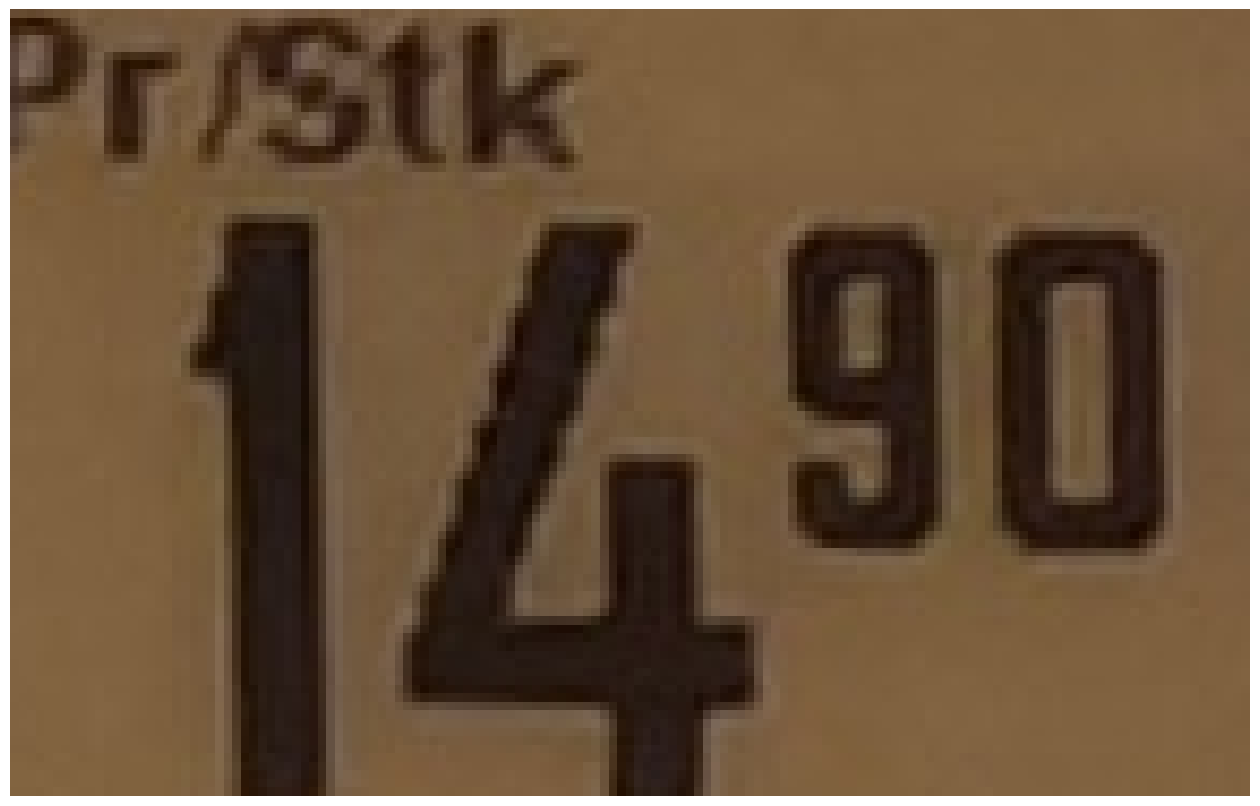

[     1680.6      2459.8        1827      2559.7]


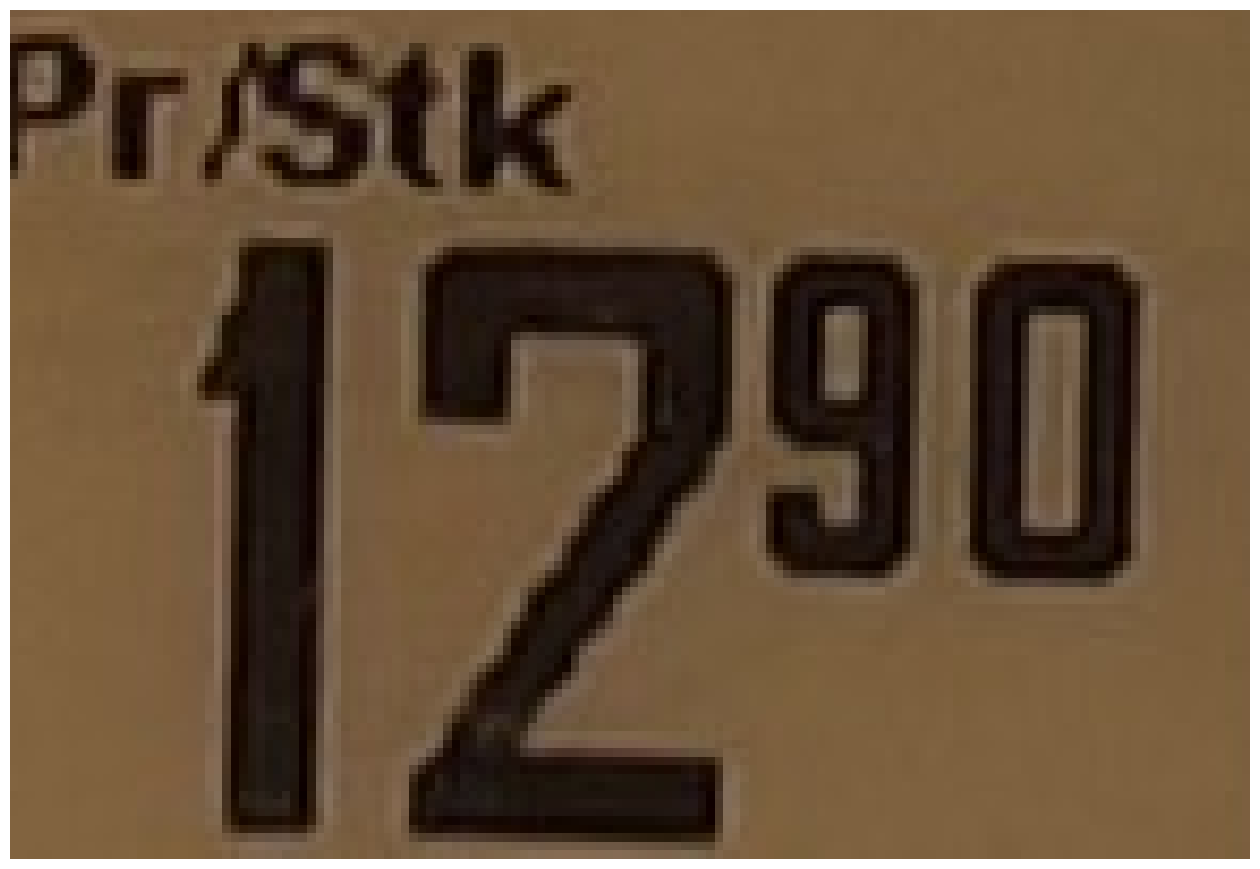

[          0      816.46      239.75      1148.3]


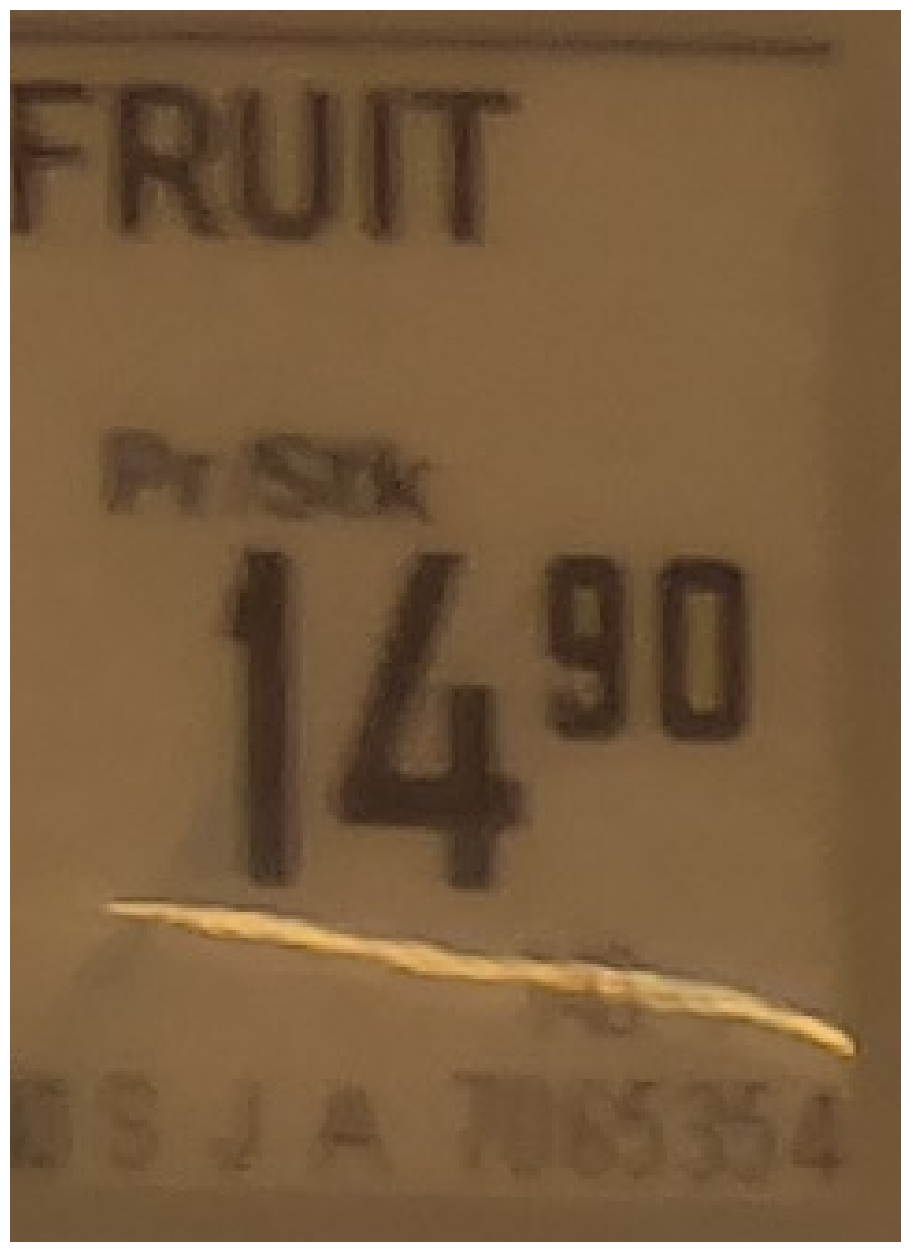

In [7]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import supervision as sv

# Load a model
# model = YOLO('yolov8n.pt')  # load an official model
model = YOLO("models/best.pt")  # load a custom model

IMAGE_NAME = "IMG_4270.jpg"
IMAGE_PATH = os.path.join(HOME, IMAGE_NAME)
cv_image = cv2.imread(IMAGE_PATH)

# Predict with the model
# results = model('Price-tags-2/valid/images/IMG_0734_jpeg.rf.5f7c304d33522c57f8d8a06c9ba8a062.jpg')  # predict on an image
results = model(cv_image)  # predict on an image

for r in results:
    for dim in r.boxes.xyxy.numpy():
        print(dim)
        x, y, x1, y1 = dim
        image = cv_image[round(y) : round(y1), round(x) : round(x1)]

        sv.plot_image(image, (16, 16))

In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO("runs/detect/train7/weights/best.pt")  # load a custom model

model.export(format="tflite")

Error: Unable to infer type of dictionary: Cannot infer concrete type of torch.nn.Module

In [8]:
!yolo mode=export model="models/best.pt" format=torchscript optimize


Ultralytics YOLOv8.0.196 🚀 Python-3.11.0 torch-2.1.0 CPU (Apple M2 Max)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'models/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)

TorchScript: starting export with torch 2.1.0...
TorchScript: optimizing for mobile...
TorchScript: export success ✅ 1.3s, saved as 'models/best.torchscript' (42.6 MB)

Export complete (1.8s)
Results saved to /Users/daniel.kaldheim/Projects/Crudus Heima/shop-price-tag/models
Predict:         yolo predict task=detect model=models/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=models/best.torchscript imgsz=640 data=/notebooks/Price-tags-4/data.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export
